In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
rainfall_data = pd.read_csv('/content/drive/MyDrive/DataSets/new/rainfall_data.csv')
elevation_data = pd.read_csv('/content/drive/MyDrive/DataSets/new/elevation_data.csv')
flood_history = pd.read_csv('/content/drive/MyDrive/DataSets/new/District_FloodedArea.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EDA 1**

Missing Values After Filling:
 SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


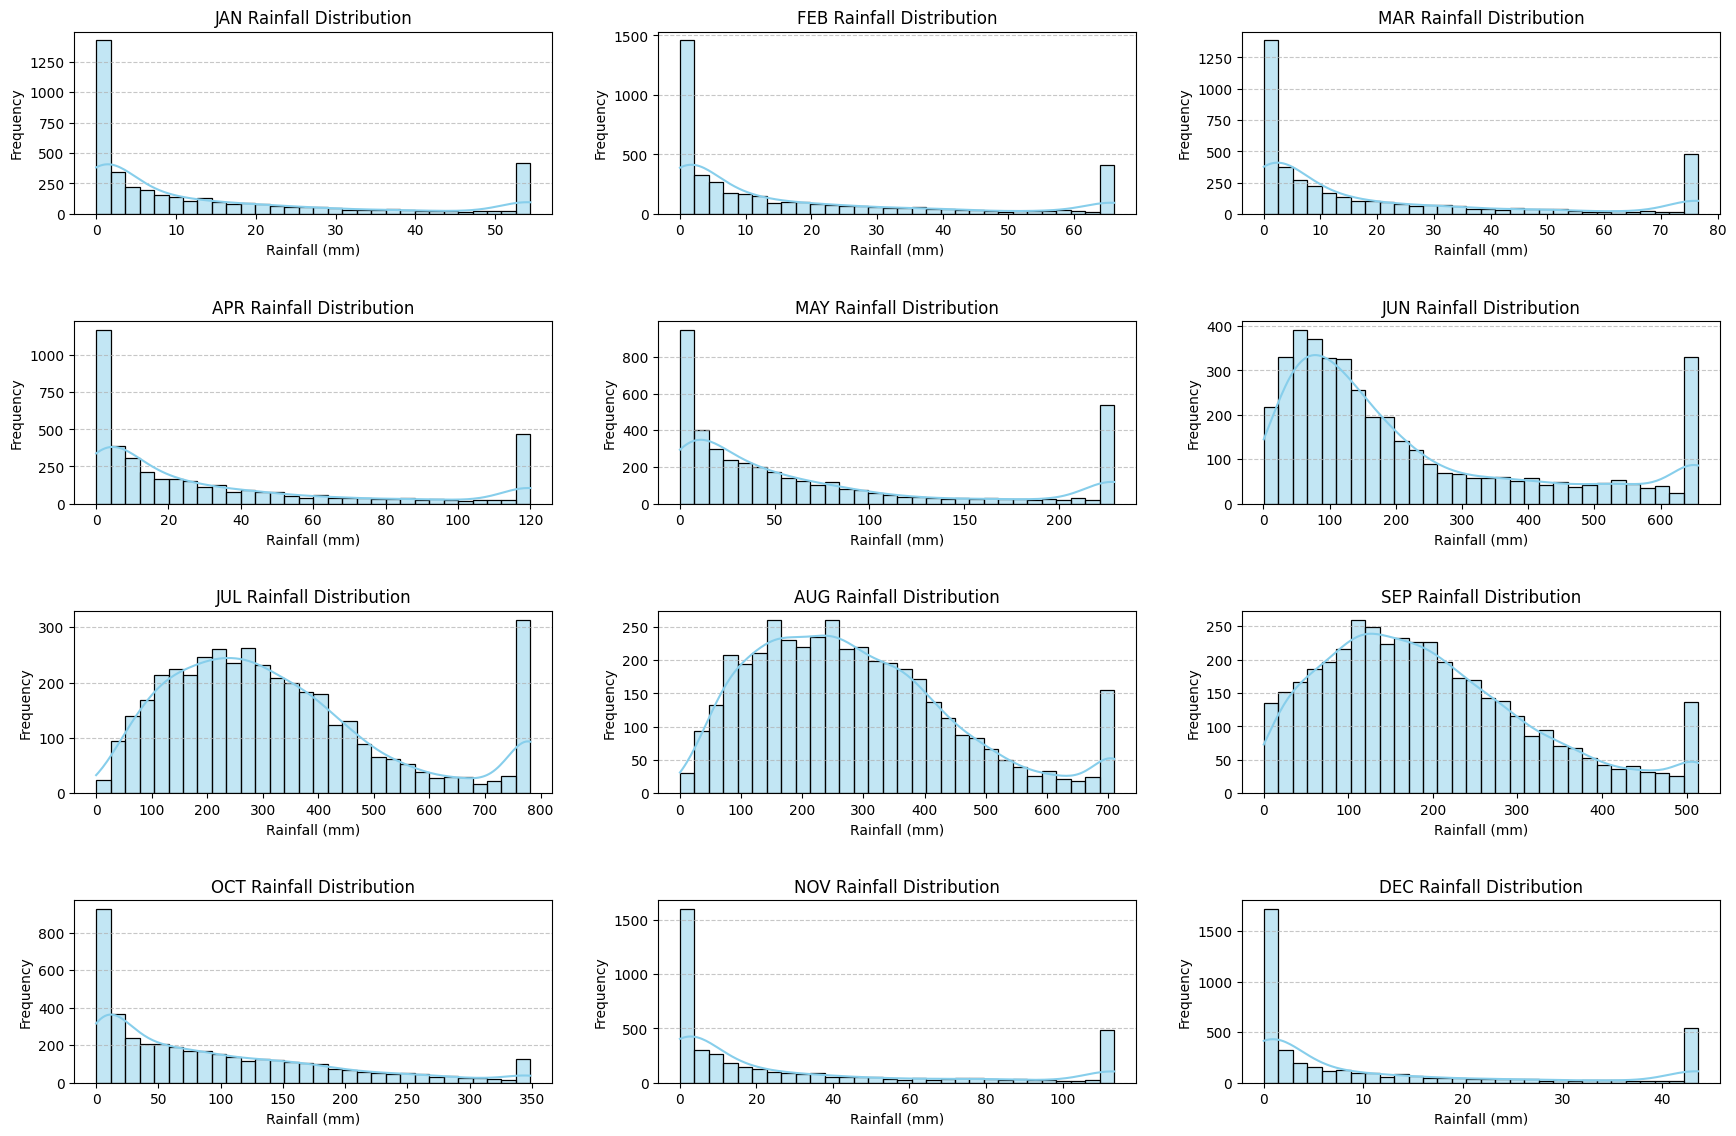

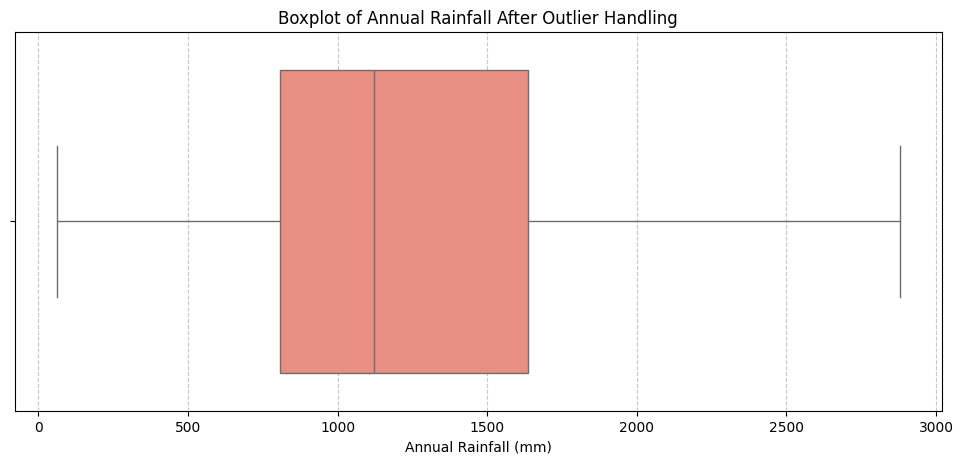

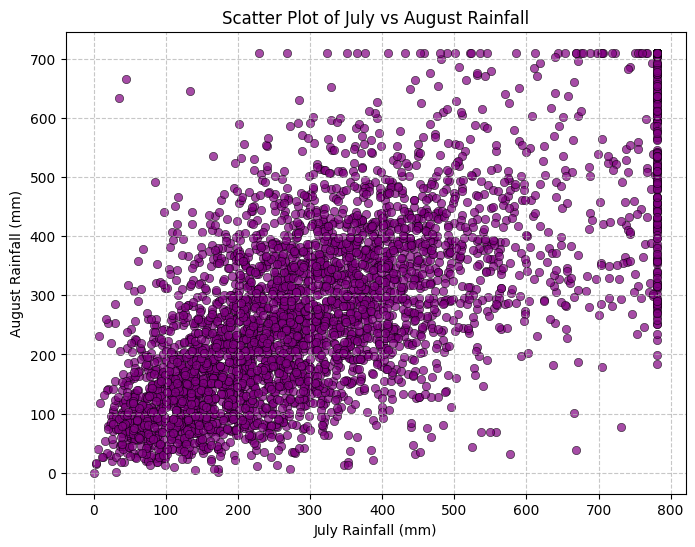

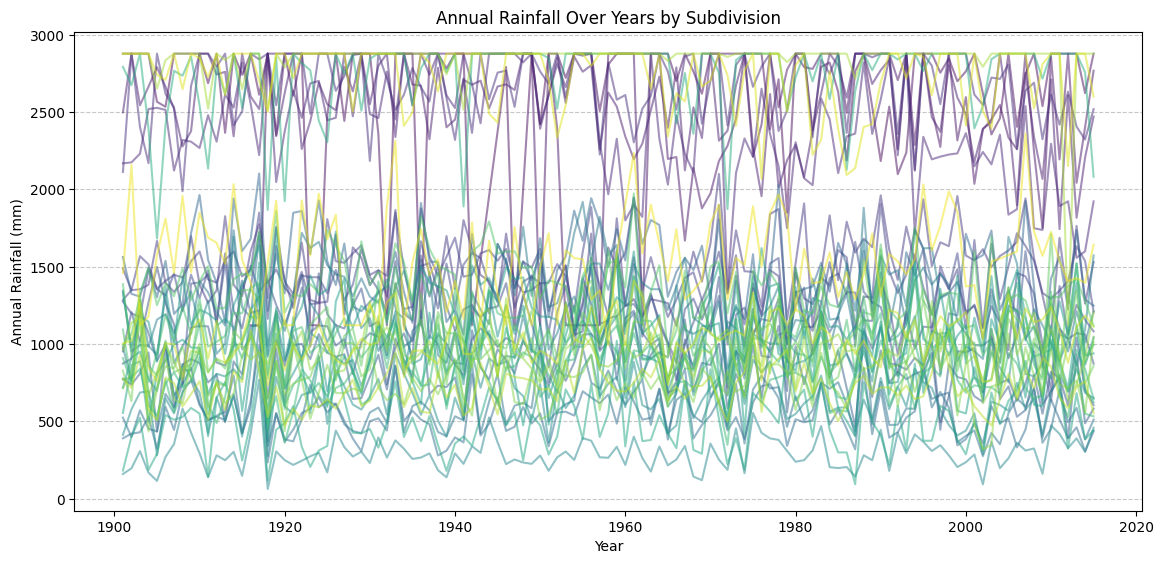

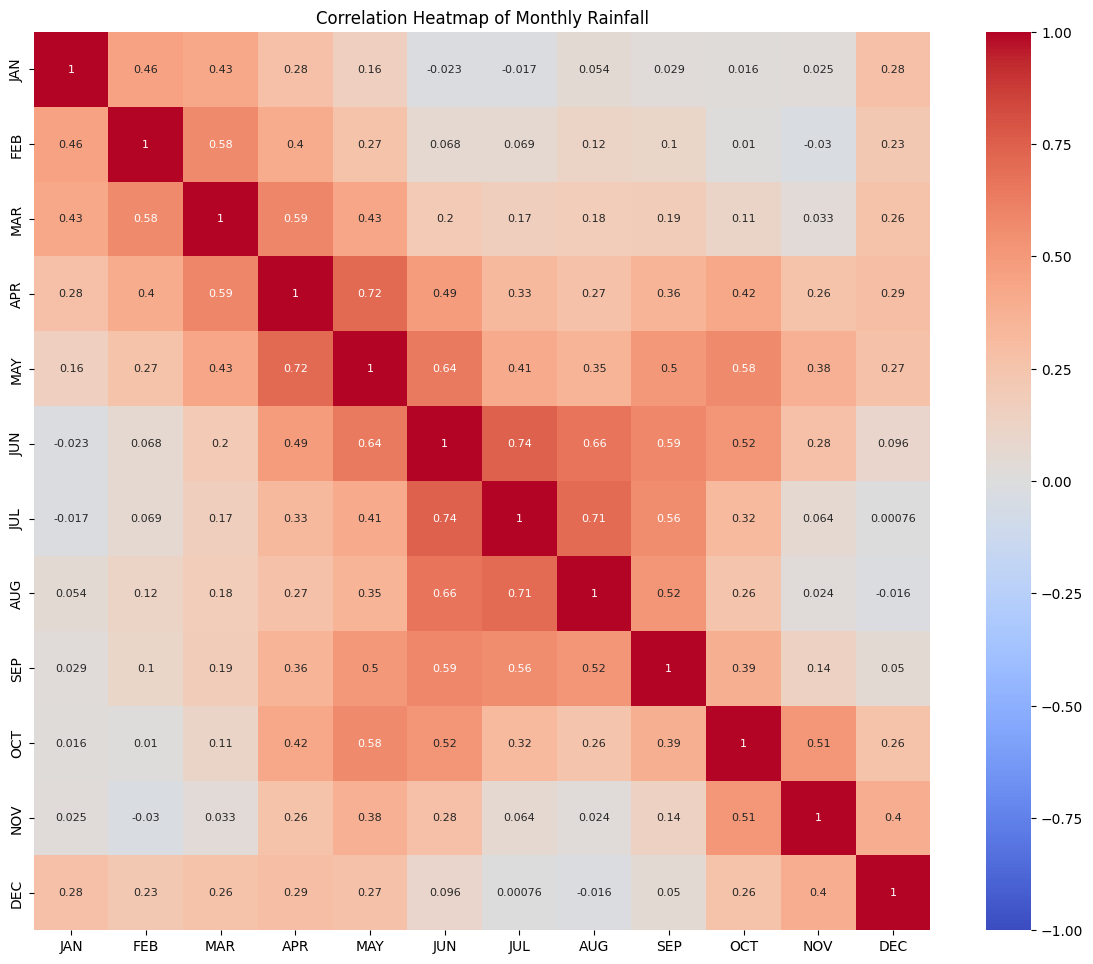

In [ ]:
# 1. Fill Missing Values with Monthly Median
rainfall_data.fillna(rainfall_data.median(numeric_only=True), inplace=True)

# 2. Outlier Handling Using IQR Method
# Define a function to handle outliers by capping them within the IQR range
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Apply the function to all monthly columns and annual rainfall
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL']
cap_outliers(rainfall_data, monthly_columns)

# 3. Check if there are any remaining missing values
print("Missing Values After Filling:\n", rainfall_data.isnull().sum())

# 4. Distribution Plot for Each Month
plt.figure(figsize=(18, 12))
for i, month in enumerate(monthly_columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(rainfall_data[month], kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f'{month} Rainfall Distribution')
    plt.xlabel('Rainfall (mm)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3.0)
plt.show()

# 5. Boxplot for Outlier Confirmation (Annual Rainfall Example)
plt.figure(figsize=(10, 5))
sns.boxplot(x=rainfall_data['ANNUAL'], color="salmon")
plt.title("Boxplot of Annual Rainfall After Outlier Handling")
plt.xlabel("Annual Rainfall (mm)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.0)
plt.show()

# 6. Scatter Plot for Monthly Rainfall Comparison (July vs August)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='JUL', y='AUG', data=rainfall_data, color="purple", edgecolor="black", alpha=0.7)
plt.title("Scatter Plot of July vs August Rainfall")
plt.xlabel("July Rainfall (mm)")
plt.ylabel("August Rainfall (mm)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 7. Time Series Analysis of Annual Rainfall
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='ANNUAL', data=rainfall_data, hue='SUBDIVISION', legend=False, palette="viridis", alpha=0.5)
plt.title("Annual Rainfall Over Years by Subdivision")
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.0)
plt.show()

# 8. Correlation Heatmap for Monthly Rainfall
plt.figure(figsize=(12, 10))
correlation_matrix = rainfall_data[monthly_columns[:-1]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title("Correlation Heatmap of Monthly Rainfall")
plt.tight_layout(pad=2.0)
plt.show()

**EDA 2**

Missing Values in Elevation Data:
 District     0
Latitude     0
Longitude    0
elevation    0
dtype: int64


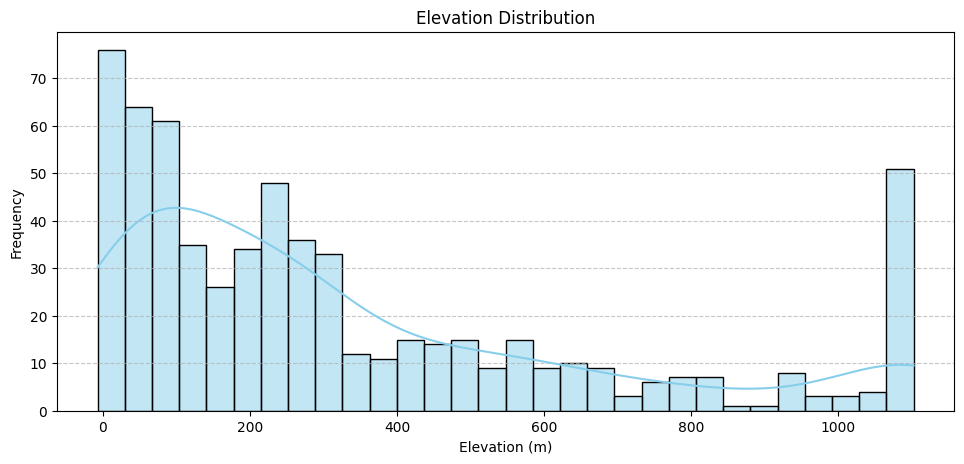

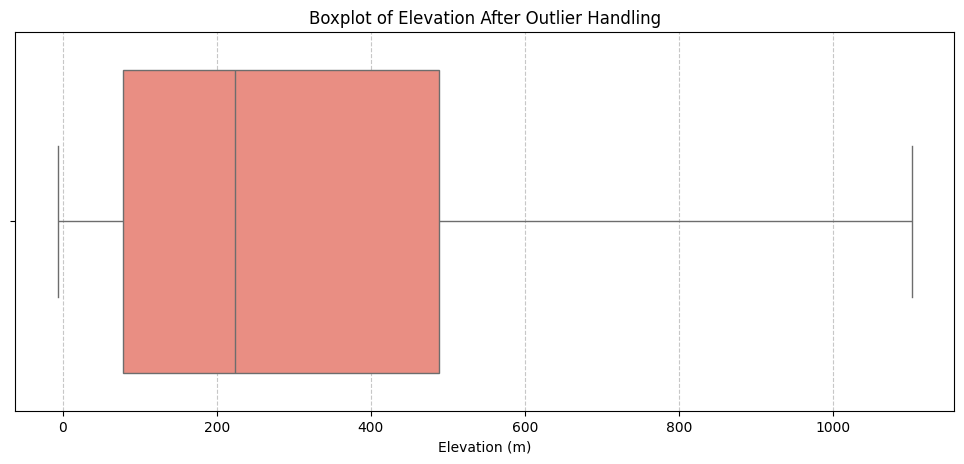

In [ ]:
# 1. Fill Missing Values with Median for numeric columns
elevation_data.fillna(elevation_data.median(numeric_only=True), inplace=True)

# 2. Outlier Handling using IQR Method
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Applying the function to the 'elevation' column
cap_outliers(elevation_data, ['elevation'])

# 3. Check if there are any remaining missing values
print("Missing Values in Elevation Data:\n", elevation_data.isnull().sum())

# 4. Distribution Plot for Elevation Data
plt.figure(figsize=(10, 5))
sns.histplot(elevation_data['elevation'], kde=True, bins=30, color="skyblue", edgecolor="black")
plt.title('Elevation Distribution')
plt.xlabel('Elevation (m)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.0)
plt.show()

# 5. Boxplot for Outlier Confirmation in Elevation Data
plt.figure(figsize=(10, 5))
sns.boxplot(x=elevation_data['elevation'], color="salmon")
plt.title("Boxplot of Elevation After Outlier Handling")
plt.xlabel("Elevation (m)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.0)
plt.show()

**EDA 3**

Missing Values in Flooded Area Data:
 Dist_Name                         0
Percent_Flooded_Area              0
Parmanent_Water                   0
Corrected_Percent_Flooded_Area    0
dtype: int64


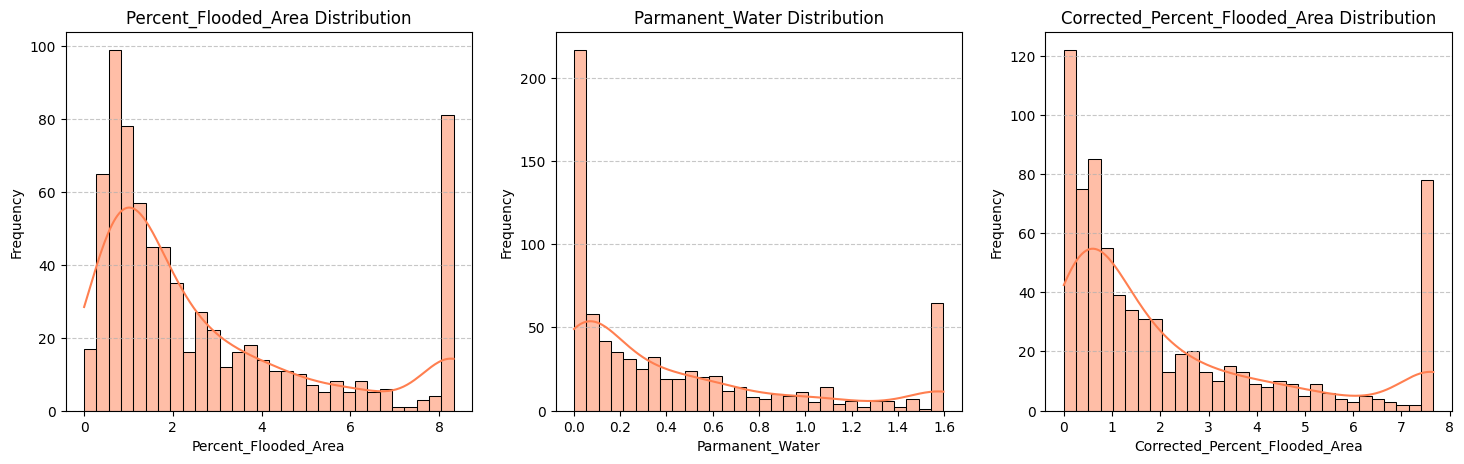

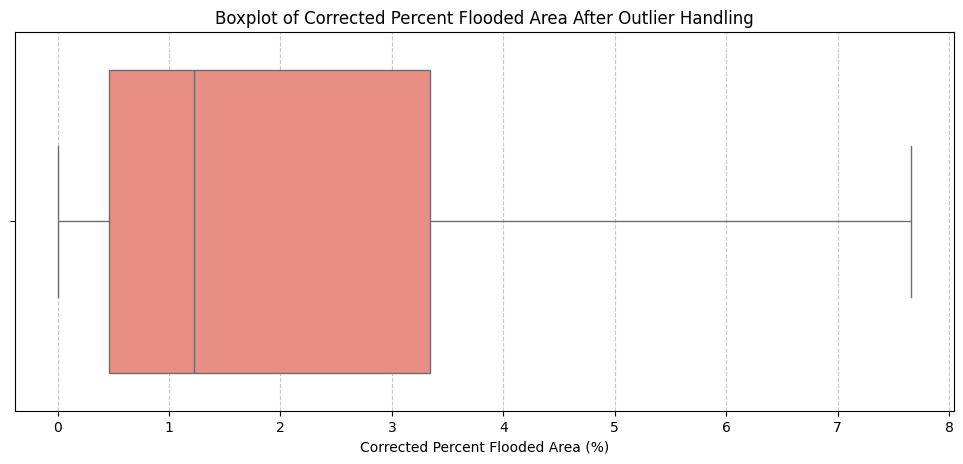

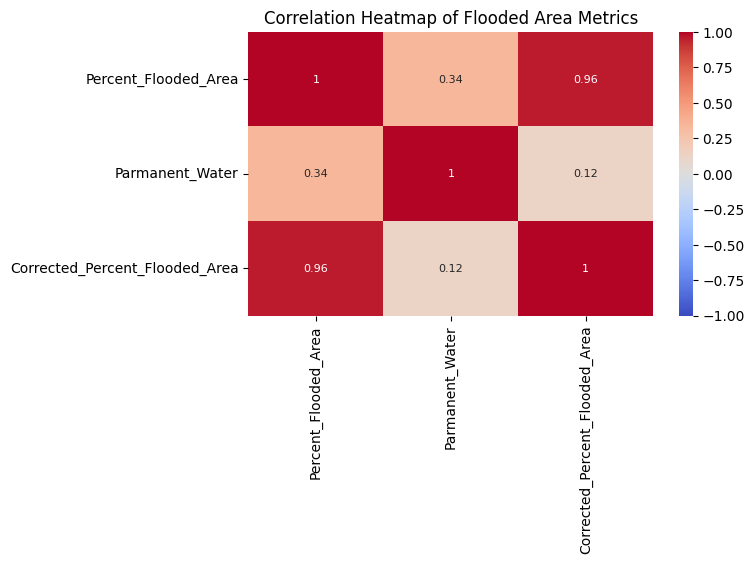

In [ ]:
# 1. Fill Missing Values with Median for numeric columns
flood_history.fillna(flood_history.median(numeric_only=True), inplace=True)

# 2. Outlier Handling using IQR Method
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Applying the function to relevant columns in the flooded area dataset
flooded_columns = ['Percent_Flooded_Area', 'Parmanent_Water', 'Corrected_Percent_Flooded_Area']
cap_outliers(flood_history, flooded_columns)

# 3. Check if there are any remaining missing values
print("Missing Values in Flooded Area Data:\n", flood_history.isnull().sum())

# 4. Distribution Plots for Flooded Area Data
plt.figure(figsize=(15, 5))
for i, col in enumerate(flooded_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(flood_history[col], kde=True, bins=30, color="coral", edgecolor="black")
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.0)
plt.show()

# 5. Boxplot for Outlier Confirmation (Example: Corrected Percent Flooded Area)
plt.figure(figsize=(10, 5))
sns.boxplot(x=flood_history['Corrected_Percent_Flooded_Area'], color="salmon")
plt.title("Boxplot of Corrected Percent Flooded Area After Outlier Handling")
plt.xlabel("Corrected Percent Flooded Area (%)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.0)
plt.show()

# 6. Correlation Heatmap for Flooded Area Data
plt.figure(figsize=(8, 6))
correlation_matrix_flooded = flood_history[flooded_columns].corr()
sns.heatmap(correlation_matrix_flooded, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title("Correlation Heatmap of Flooded Area Metrics")
plt.tight_layout(pad=2.0)
plt.show()

**Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

rainfall_data['SUBDIVISION'] = rainfall_data['SUBDIVISION'].str.lower()
flood_history['Dist_Name'] = flood_history['Dist_Name'].str.lower()
elevation_data.rename(columns={'District': 'Dist_Name'}, inplace=True)
elevation_data['Dist_Name'] = elevation_data['Dist_Name'].str.lower()



def match_district_names(source_series, *target_series_list, initial_threshold=80, min_threshold=50, step=10):
    # Combine all target series into a comprehensive set of unique names
    combined_targets = pd.Series(pd.concat(target_series_list).unique())

    matched_names = {}

    for name in source_series.unique():
        # Try matching with a high threshold and gradually lower it
        threshold = initial_threshold
        matched = False

        while threshold >= min_threshold and not matched:
            match_score = process.extractOne(name, combined_targets, scorer=fuzz.token_sort_ratio)

            # Check if we found a match within the current threshold
            if match_score and match_score[1] >= threshold:
                matched_names[name] = match_score[0]
                matched = True
            else:
                # Lower the threshold incrementally
                threshold -= step

        # If no match found above minimum threshold, keep original name
        if not matched:
            matched_names[name] = name

    return matched_names

# Apply fuzzy matching to standardize names in rainfall_data with broader method
rainfall_data['SUBDIVISION'] = rainfall_data['SUBDIVISION'].map(
    match_district_names(rainfall_data['SUBDIVISION'], flood_history['Dist_Name'], elevation_data['Dist_Name'])
)

# Step 4: Merge Datasets
merged_data = pd.merge(rainfall_data, flood_history, left_on='SUBDIVISION', right_on='Dist_Name', how='inner')
merged_data = pd.merge(merged_data, elevation_data, on='Dist_Name', how='left')

# Print the shape of merged_data to check for 0 rows
print("Shape of merged_data:", merged_data.shape)

# Step 5: Feature Engineering
# Create flood vulnerability score from historical data
merged_data['Flood_Vulnerability_Score'] = merged_data['Corrected_Percent_Flooded_Area'] + merged_data['Parmanent_Water']

# Create flood risk category (High, Medium, Low) based on rainfall, elevation, and vulnerability score
conditions = [
    (merged_data['ANNUAL'] > 1000) & (merged_data['elevation'] < 100) & (merged_data['Flood_Vulnerability_Score'] > 5),
    (merged_data['ANNUAL'] > 500) & (merged_data['elevation'] < 200) & (merged_data['Flood_Vulnerability_Score'] > 2),
    (merged_data['ANNUAL'] <= 500) | (merged_data['elevation'] > 200) | (merged_data['Flood_Vulnerability_Score'] <= 2)
]
choices = ['High', 'Medium', 'Low']
merged_data['Flood_Risk'] = pd.Series(pd.Categorical(np.select(conditions, choices, default='Low'), categories=choices, ordered=True))

# Step 6: Model Preparation
# Select features and target for the model
X = merged_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'elevation', 'Flood_Vulnerability_Score']]
y = merged_data['Flood_Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train Model (Random Forest Classifier for Classification)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

# Initialize label encoder
label_encoder = LabelEncoder()

label_encoder.fit(choices)

# Encode the labels in y_test and y_pred
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)


# Calculate F1 Score (weighted for multiclass classification)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (weighted):", f1)

# Calculate RMSE on encoded labels
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
print("RMSE:", rmse)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Define a function to calculate flood vulnerability score based on rainfall
def calculate_flood_vulnerability_score(rainfall_data):
    # Calculate the total annual rainfall
    annual_rainfall = sum(rainfall_data)

    # Set flood vulnerability thresholds
    score = 0
    for rainfall in rainfall_data:
        if rainfall > 100:  # If monthly rainfall is more than 100mm, increase score
            score += 1

    # Add additional points based on annual rainfall
    if annual_rainfall > 1000:  # If annual rainfall exceeds 1000mm, increase vulnerability
        score += 2
    elif annual_rainfall > 500:
        score += 1

    # Ensure the score is within a reasonable range, e.g., 0 to 10
    score = min(score, 10)

    return score

# Function to get user input for flood risk prediction
def get_user_input():
    print("Please enter the following values to predict flood risk:")
    place_data = {}

    # Prompt user to enter monthly rainfall values
    for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']:
        place_data[month] = float(input(f"Enter the average rainfall for {month} (in mm): "))

    # Prompt for elevation and flood vulnerability score
    place_data['elevation'] = float(input("Enter the elevation (in meters): "))

    # Calculate Flood Vulnerability Score based on monthly rainfall
    place_data['Flood_Vulnerability_Score'] = calculate_flood_vulnerability_score(list(place_data.values())[:12])

    return pd.DataFrame([place_data])

# Take user input for new prediction
place_df = get_user_input()

# Make prediction based on user input
predicted_risk_category = model.predict(place_df)

# Output the prediction
print("Predicted Flood Risk based on your inputs:", predicted_risk_category[0])

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Shape of merged_data: (3771, 26)
F1 Score (weighted): 0.9842801219813274
RMSE: 0.19262002361705083

Classification Report:
               precision    recall  f1-score   support

        High       0.96      0.99      0.98       164
         Low       1.00      0.99      0.99       870
      Medium       0.89      0.93      0.91        98

    accuracy                           0.98      1132
   macro avg       0.95      0.97      0.96      1132
weighted avg       0.98      0.98      0.98      1132

Please enter the following values to predict flood risk:
Enter the average rainfall for JAN (in mm): 150
Enter the average rainfall for FEB (in mm): 120
Enter the average rainfall for MAR (in mm): 130
Enter the average rainfall for APR (in mm): 60
Enter the average rainfall for MAY (in mm): 50
Enter the average rainfall for JUN (in mm): 90
Enter the average rainfall for JUL (in mm): 36
Enter the average rainfall for AUG (in mm): 45
Enter the average rainfall for SEP (in mm): 200
Enter the a

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, roc_curve, roc_auc_score, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import label_binarize

# Initialize label encoder for encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Ensure test labels are transformed similarly

# Train the classifier (Random Forest as an example)
clf = RandomForestClassifier()
clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_encoded = clf.predict(X_test)

# --- Calculate Mean Absolute Error (MAE) ---
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
print("Mean Absolute Error (MAE):", mae)

# --- Calculate Variance Score ---
variance_score = r2_score(y_test_encoded, y_pred_encoded)  # For classification tasks, it's the same as R-squared
print("Variance Score (R^2):", variance_score)

# --- Calculate Training and Testing Scores ---
train_score = clf.score(X_train, y_train_encoded)  # Accuracy on training set
test_score = clf.score(X_test, y_test_encoded)  # Accuracy on test set

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix  # Import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import label_binarize
import seaborn as sns# --- Confusion Matrix ---
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
#3D scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Select three features for plotting
X_train_subset = X_train[['JAN', 'elevation', 'Flood_Vulnerability_Score']]
y_train_numeric = label_encoder.transform(y_train)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map flood risk categories to colors for visualization
colors = sns.color_palette("viridis", len(choices))
risk_colors = [colors[i] for i in y_train_numeric]

# Plot the data
scatter = ax.scatter(
    X_train_subset['JAN'],
    X_train_subset['elevation'],
    X_train_subset['Flood_Vulnerability_Score'],
    c=risk_colors,
    s=50, edgecolor='k'
)

# Labeling the axes
ax.set_xlabel("JAN Rainfall (mm)")
ax.set_ylabel("Elevation (m)")
ax.set_zlabel("Flood Vulnerability Score")

# Adding legend based on risk categories
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(legend_labels, choices, title="Flood Risk")

plt.title("3D Scatter Plot of Flood Risk Prediction Features")
plt.show()


In [ ]:
merged_data

In [ ]:
merged_data
merged_data.to_csv('merged_data.csv', index=False)
from google.colab import files
files.download('merged_data.csv')

**Linear Regression**

In [ ]:
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset (replace with the correct path)
df = merged_data

# Drop unnecessary categorical columns
df = df.drop(columns=['SUBDIVISION', 'YEAR', 'Dist_Name'], errors='ignore')

# Define the features and handle missing values with most frequent values
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL',
            'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'Percent_Flooded_Area', 'Parmanent_Water', 'Latitude',
            'Longitude', 'elevation']
imputer = SimpleImputer(strategy='most_frequent')
df[features] = imputer.fit_transform(df[features])

# Define features and target variable
X = df[features]
y = df['Flood_Vulnerability_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")

# Fetch real-time weather data without exception handling
def get_weather_data(api_key, latitude, longitude):
    url = f'http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}&units=metric'
    response = requests.get(url)

    if response.status_code == 200:  # Check if the request was successful
        weather_data = response.json()

        rainfall = weather_data.get('rain', {}).get('1h', 0)  # Rainfall in the last hour, default to 0 if missing
        temperature = weather_data['main']['temp']

        return {
            'rainfall': rainfall,
            'temperature': temperature,
            'latitude': latitude,
            'longitude': longitude,
            'elevation': 10  # Default elevation value
        }
    else:
        # Return default data if request fails
        print("Failed to fetch weather data.")
        return {
            'rainfall': 0,
            'temperature': 25,  # Average temperature in Celsius
            'latitude': latitude,
            'longitude': longitude,
            'elevation': 10
        }

# Predict flood risk based on real-time weather data
def predict_flood_risk(weather_data, model):
    # Construct realistic monthly and seasonal estimates from real-time data
    monthly_rainfall = weather_data['rainfall'] * 30  # Simplified monthly estimate
    annual_rainfall = monthly_rainfall * 12  # Estimate total annual rainfall

    input_data = np.array([
        monthly_rainfall,  # JAN
        monthly_rainfall,  # FEB
        monthly_rainfall,  # MAR
        monthly_rainfall,  # APR
        monthly_rainfall,  # MAY
        monthly_rainfall,  # JUN
        monthly_rainfall,  # JUL
        monthly_rainfall,  # AUG
        monthly_rainfall,  # SEP
        monthly_rainfall,  # OCT
        monthly_rainfall,  # NOV
        monthly_rainfall,  # DEC
        annual_rainfall,   # ANNUAL
        monthly_rainfall * 2,   # Jan-Feb
        monthly_rainfall * 3,   # Mar-May
        monthly_rainfall * 4,   # Jun-Sep
        monthly_rainfall * 3,   # Oct-Dec
        weather_data['rainfall'] * 0.1,  # Simplified Percent_Flooded_Area
        0,  # Parmanent_Water placeholder
        weather_data['latitude'],
        weather_data['longitude'],
        weather_data['elevation']
    ]).reshape(1, -1)

    flood_risk_prediction = model.predict(input_data)

    # Classify flood risk based on prediction
    flood_risk = np.clip(flood_risk_prediction, 0, 10)  # Example: limit score to a range of 0-10
    print(f"Predicted Flood Risk: {flood_risk}")
    return "Flood likely" if flood_risk >= 5 else "Flood unlikely"

# Get user input for location
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))
elevation = float(input("Enter elevation: "))
api_key = 'c8b17ec76e6b9c1c0ad51b1e79002bb6'

# Fetch real-time weather data
weather_data = get_weather_data(api_key, latitude, longitude)

# Predict flood risk
flood_risk = predict_flood_risk(weather_data, model)

#print(f"Predicted Flood Risk: {flood_risk}")


Root Mean Squared Error (RMSE): 0.38178222338034096
R-squared: 0.9794648999186721
Enter latitude: 55
Enter longitude: 68
Enter elevation: 10
Predicted Flood Risk: [0.86455623]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df[features]
y = df['Flood_Vulnerability_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (Variance Score)
variance_score = r2_score(y_test, y_pred)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Convert continuous predictions into categorical values (Low, Medium, High)
y_true_categorical = np.clip(y_test, 0, 10)  # Clip true values to the range 0-10 (adjust as needed)
y_pred_categorical = np.clip(y_pred, 0, 10)

# Classify into bins: 0-3 = Low, 4-7 = Medium, 8-10 = High
bins = [0, 3, 7, 10]
y_true_class = np.digitize(y_true_categorical, bins=bins)
y_pred_class = np.digitize(y_pred_categorical, bins=bins)

# Calculate F1 Score for multi-class classification
f1 = f1_score(y_true_class, y_pred_class, average='weighted', labels=[1, 2, 3])

# Generate ROC curve (for multi-class)
y_test_bin = label_binarize(y_true_class, classes=[1, 2, 3])  # One-hot encoding for multi-class
y_pred_bin = label_binarize(y_pred_class, classes=[1, 2, 3])

# ROC curve for each class
fpr0, tpr0, _ = roc_curve(y_test_bin[:, 0], y_pred_bin[:, 0])  # Class 1: Low
fpr1, tpr1, _ = roc_curve(y_test_bin[:, 1], y_pred_bin[:, 1])  # Class 2: Medium
fpr2, tpr2, _ = roc_curve(y_test_bin[:, 2], y_pred_bin[:, 2])  # Class 3: High

# Calculate Macro AUC
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr0, tpr0, color='blue', label=f'Low (AUC = {roc_auc_score(y_test_bin[:, 0], y_pred_bin[:, 0]):.2f})')
plt.plot(fpr1, tpr1, color='green', label=f'Medium (AUC = {roc_auc_score(y_test_bin[:, 1], y_pred_bin[:, 1]):.2f})')
plt.plot(fpr2, tpr2, color='red', label=f'High (AUC = {roc_auc_score(y_test_bin[:, 2], y_pred_bin[:, 2]):.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

# Output the calculated metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Variance Score (R-squared): {variance_score}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"F1 Score (weighted): {f1}")
print(f"Macro AUC: {roc_auc}")


In [ ]:
# Define a sample input with hypothetical rainfall and other necessary values
sample_input_data = {
    'rainfall': 10.5,  # Hypothetical hourly rainfall data in mm
    'latitude': 26.08,  # Example latitude
    'longitude': 91.47,  # Example longitude
    'elevation': 10  # Example elevation
}

# Manually create an input for all features based on the sample input data
test_input = np.array([
    sample_input_data['rainfall'],  # JAN
    sample_input_data['rainfall'],  # FEB
    sample_input_data['rainfall'],  # MAR
    sample_input_data['rainfall'],  # APR
    sample_input_data['rainfall'],  # MAY
    sample_input_data['rainfall'],  # JUN
    sample_input_data['rainfall'],  # JUL
    sample_input_data['rainfall'],  # AUG
    sample_input_data['rainfall'],  # SEP
    sample_input_data['rainfall'],  # OCT
    sample_input_data['rainfall'],  # NOV
    sample_input_data['rainfall'],  # DEC
    sample_input_data['rainfall'] * 12,  # ANNUAL (simplified as rainfall * 12)
    0,  # Jan-Feb (placeholder value)
    0,  # Mar-May (placeholder value)
    0,  # Jun-Sep (placeholder value)
    0,  # Oct-Dec (placeholder value)
    sample_input_data['rainfall'],  # Percent_Flooded_Area (simplified)
    0,  # Parmanent_Water placeholder
    sample_input_data['latitude'],
    sample_input_data['longitude'],
    sample_input_data['elevation']
]).reshape(1, -1)

# Predict flood risk based on this sample input
predicted_flood_risk = model.predict(test_input)
print(f"Predicted Flood Risk for sample input: {predicted_flood_risk[0]}")

**MLP Model**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset (replace with the correct path)
df = merged_data

# Drop unnecessary categorical columns
df = df.drop(columns=['SUBDIVISION', 'YEAR', 'Dist_Name'], errors='ignore')

# Define the features and handle missing values with most frequent values
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'Percent_Flooded_Area', 'Parmanent_Water', 'Latitude', 'Longitude', 'elevation']
imputer = SimpleImputer(strategy='most_frequent')
df[features] = imputer.fit_transform(df[features])

# Define features and target variable
X = df[features]
y = df['Flood_Vulnerability_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the imputer, scaler, and model in a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fills NaNs with the column mean
    ('scaler', StandardScaler()),                # Scales the features
    ('mlp', MLPRegressor(hidden_layer_sizes=(64, 64, 32), max_iter=500, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on test data and evaluate the model
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")

# Convert predictions and actual values to binary for F1 score calculation
threshold = 0.5
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

# Calculate and display F1 score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1 Score: {f1}")

# Collect input from the user for each feature
def get_user_input():
    print("Please enter the following values to predict flood risk:")
    place_data = {}

    for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']:
        place_data[month] = float(input(f"Enter the average rainfall for {month} (in mm): "))

    # Prompt for seasonal and annual rainfall
    place_data['ANNUAL'] = float(input("Enter the annual rainfall (in mm): "))
    place_data['Jan-Feb'] = float(input("Enter the Jan-Feb rainfall (in mm): "))
    place_data['Mar-May'] = float(input("Enter the Mar-May rainfall (in mm): "))
    place_data['Jun-Sep'] = float(input("Enter the Jun-Sep rainfall (in mm): "))
    place_data['Oct-Dec'] = float(input("Enter the Oct-Dec rainfall (in mm): "))

    # Prompt for additional features
    place_data['Percent_Flooded_Area'] = float(input("Enter the flooded area percentage: "))
    place_data['Parmanent_Water'] = float(input("Enter the permanent water index: "))
    place_data['Latitude'] = float(input("Enter the latitude: "))
    place_data['Longitude'] = float(input("Enter the longitude: "))
    place_data['elevation'] = float(input("Enter the elevation (in meters): "))
    #1place_data['Flood_Vulnerability_Score'] = calculate_flood_vulnerability_score(list(place_data.values())[:12])

    return pd.DataFrame([place_data])

# Convert input to numpy array and reshape to 1match model input
test_input = get_user_input().values.reshape(1, -1)

# Scale and predict using the trained pipeline
test_output = pipeline.predict(test_input)

# Display the prediction result
print("Predicted Flood Risk Score:", test_output[0])
#print(place_data)

Root Mean Squared Error (RMSE): 0.11233838996399328
R-squared: 0.9982220407263652
F1 Score: 0.9818971759594497
Please enter the following values to predict flood risk:
Enter the average rainfall for JAN (in mm): 156
Enter the average rainfall for FEB (in mm): 80
Enter the average rainfall for MAR (in mm): 85
Enter the average rainfall for APR (in mm): 98
Enter the average rainfall for MAY (in mm): 70
Enter the average rainfall for JUN (in mm): 55
Enter the average rainfall for JUL (in mm): 91
Enter the average rainfall for AUG (in mm): 78
Enter the average rainfall for SEP (in mm): 65
Enter the average rainfall for OCT (in mm): 21
Enter the average rainfall for NOV (in mm): 23
Enter the average rainfall for DEC (in mm): 99
Enter the annual rainfall (in mm): 250
Enter the Jan-Feb rainfall (in mm): 70
Enter the Mar-May rainfall (in mm): 88
Enter the Jun-Sep rainfall (in mm): 54
Enter the Oct-Dec rainfall (in mm): 99
Enter the flooded area percentage: 40
Enter the permanent water index: 4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Explained Variance
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance: {explained_variance}")

# ROC Curve for regression (assume binary threshold of 0.5 for classification-like ROC curve)
# Set threshold, e.g., classify as "High Risk" if predicted flood risk score > 0.5
binary_y_test = (y_test >= 0.5).astype(int)  # Convert true values to binary
binary_y_pred = (y_pred >= 0.5).astype(int)  # Convert predictions to binary

fpr, tpr, thresholds = roc_curve(binary_y_test, y_pred)  # Use raw y_pred for continuous ROC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Regression (Threshold-Based)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define binary classification (threshold at 0.5)
y_test_binary = (y_test >= 0.5).astype(int)  # True labels as binary
y_pred_binary = (y_pred >= 0.5).astype(int)  # Predictions as binary

# Compute and display confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Risk", "High Risk"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Threshold-Based Flood Risk Prediction")
plt.show()


**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.metrics import mean_absolute_error, f1_score, mean_squared_error, explained_variance_score

# Drop rows with missing values
merged_data_cleaned = merged_data.dropna()

# Encode the target variable 'Flood_Risk' as binary (0: Low, 1: High)
merged_data_cleaned['Flood_Risk'] = merged_data_cleaned['Flood_Risk'].apply(lambda x: 1 if x == 'High' else 0)

# Check initial class distribution
print("Initial Class Distribution:\n", merged_data_cleaned['Flood_Risk'].value_counts())

# Aggregate monthly rainfall data (e.g., calculate the average of the last 3 months)
merged_data_cleaned['Avg_Monthly_Rainfall'] = merged_data_cleaned[['AUG', 'SEP', 'OCT']].mean(axis=1)

# Select features (Average Rainfall and Elevation) and target
features = merged_data_cleaned[['Avg_Monthly_Rainfall', 'elevation']]
target = merged_data_cleaned['Flood_Risk']

# Separate majority and minority classes
majority = merged_data_cleaned[merged_data_cleaned['Flood_Risk'] == 0]
minority = merged_data_cleaned[merged_data_cleaned['Flood_Risk'] == 1]

# Upsample minority class to balance the dataset
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=0)
merged_data_balanced = pd.concat([majority, minority_upsampled])

# Verify class distribution after balancing
print("Class distribution after balancing:\n", merged_data_balanced['Flood_Risk'].value_counts())

# Select features and target
features = merged_data_balanced[['Avg_Monthly_Rainfall', 'elevation']]
target = merged_data_balanced['Flood_Risk']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=0, stratify=target)

# Initialize and train logistic regression model
log_reg = LogisticRegression(class_weight="balanced", random_state=0)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Predict flood risk based on user input for Rainfall and Elevation
def predict_flood_risk():
    # Prompt the user for input values (average rainfall over the last 3 months and elevation)
    avg_rainfall = float(input("Enter the average monthly rainfall (in mm) over the last 3 months: "))
    elevation = float(input("Enter the elevation of the area (in meters): "))

    # Create a DataFrame with the input values, making sure it matches the model features
    input_data = pd.DataFrame([[avg_rainfall, elevation]], columns=['Avg_Monthly_Rainfall', 'elevation'])

    # Standardize the input data (to match the scaling applied during training)
    input_data_scaled = scaler.transform(input_data)

    # Predict flood risk using the trained logistic regression model
    prediction = log_reg.predict(input_data_scaled)

    # Interpret the prediction
    risk_level = "High" if prediction[0] == 1 else "Low"

    # Display the result
    print(f"Predicted Flood Risk Level: {risk_level}")

# Call the function to predict flood risk
predict_flood_risk()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Variance Score
variance_score = explained_variance_score(y_test, y_pred)
print("Variance Score:", variance_score)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.utils import resample
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
'''
import numpy as np
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace with the correct path)
df = merged_data

# Drop unnecessary categorical columns: 'SUBDIVISION', 'YEAR', and 'Dist_Name'
df = df.drop(columns=['SUBDIVISION', 'YEAR', 'Dist_Name'], errors='ignore')

# Handle missing values for 'Percent_Flooded_Area', 'Parmanent_Water', and others with the mean or a default value
df.fillna(df.mode(), inplace=True)

# If Latitude, Longitude, and elevation columns are missing, add them with default values (for example, Mumbai)
if 'Latitude' not in df.columns:
    df['Latitude'] = 19.0760  # Default latitude for Mumbai
if 'Longitude' not in df.columns:
    df['Longitude'] = 72.8777  # Default longitude for Mumbai
if 'elevation' not in df.columns:
    df['elevation'] = 10  # Default elevation value

# Define features (independent variables) and target variable (dependent variable)
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL',
            'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'Percent_Flooded_Area', 'Parmanent_Water', 'Latitude',
            'Longitude', 'elevation']
X = df[features]  # Features
y = df['Flood_Vulnerability_Score']  # Target

# Predict flood risk based on real-time weather data
def predict_flood_risk(weather_data, model, scaler): # Add scaler as argument
    input_data = np.array([
        weather_data['rainfall'],
        # ... (rest of the input data) ...
    ]).reshape(1, -1)

    # Scale the input_data using the same scaler used for training data
    input_data_scaled = scaler.transform(input_data) # Scale the input data

    flood_risk_prediction = model.predict(input_data_scaled)

    return flood_risk_prediction[0]


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform a train-test split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network model
model = Sequential()

# Add input layer (the number of nodes in this layer is the same as the number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add output layer (single neuron, since we are predicting a continuous value)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test data
y_pred = model.predict(X_test)

# Check for NaN values in y_pred and replace them with a suitable value (e.g., 0)
y_pred = np.nan_to_num(y_pred)  # Replace NaN with 0

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")

# Fetch real-time weather data from OpenWeatherMap API
def get_weather_data(api_key, latitude, longitude):
    url = f'http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}&units=metric'
    response = requests.get(url)
    weather_data = response.json()

    rainfall = weather_data.get('rain', {}).get('1h', 0)
    temperature = weather_data['main']['temp']

    return {
        'rainfall': rainfall,
        'temperature': temperature,
        'latitude': latitude,
        'longitude': longitude,
        'elevation': 10  # Default elevation value
    }

# Predict flood risk based on real-time weather data
def predict_flood_risk(weather_data, model):
    input_data = np.array([
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        weather_data['rainfall'],
        0,  # Jan-Feb
        0,  # Mar-May
        0,  # Jun-Sep
        0,  # Oct-Dec
        weather_data['rainfall'],
        0,
        weather_data['latitude'],
        weather_data['longitude'],
        weather_data['elevation']
    ]).reshape(1, -1)

    flood_risk_prediction = model.predict(input_data)

    return flood_risk_prediction[0]

# Example location for prediction
latitude = 26.2006  # Example latitude for Mumbai
longitude = 92.9376  # Example longitude for Mumbai
api_key = 'c8b17ec76e6b9c1c0ad51b1e79002bb6'

# Fetch real-time weather data
weather_data = get_weather_data(api_key, latitude, longitude)

# Predict flood risk
flood_risk = predict_flood_risk(weather_data, model)

print(f"Predicted Flood Risk: {flood_risk}")

#Aradya's Code
import numpy as np
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = merged_data

# Drop unnecessary categorical columns
df = df.drop(columns=['SUBDIVISION', 'YEAR', 'Dist_Name'], errors='ignore')

# Handle missing values
df.fillna(df.mode(), inplace=True)

# Add missing columns with default values if needed
if 'Latitude' not in df.columns:
    df['Latitude'] = 19.0760
if 'Longitude' not in df.columns:
    df['Longitude'] = 72.8777
if 'elevation' not in df.columns:
    df['elevation'] = 10

# Define features and target variable
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL',
            'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'Percent_Flooded_Area', 'Parmanent_Water', 'Latitude',
            'Longitude', 'elevation']
X = df[features]
y = df['Flood_Vulnerability_Score']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model using MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(64, 64, 32), max_iter=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")
'''

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Example: Replace these with your actual test and prediction values
# y_test is the true labels from the test set
# y_pred is the predicted labels from the model
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Flood', 'Flood'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Flood Prediction")
plt.show()